In [ ]:
import numpy as np
import keras
from keras.applications.imagenet_utils import decode_predictions
import skimage.io
import skimage.segmentation
import copy
import sklearn
import sklearn.metrics
from sklearn.linear_model import LinearRegression
import warnings

np.random.seed(222)

In [ ]:
warnings.filterwarnings('ignore')
inceptionV3_model = keras.applications.inception_v3.InceptionV3() #Load pretrained model

96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


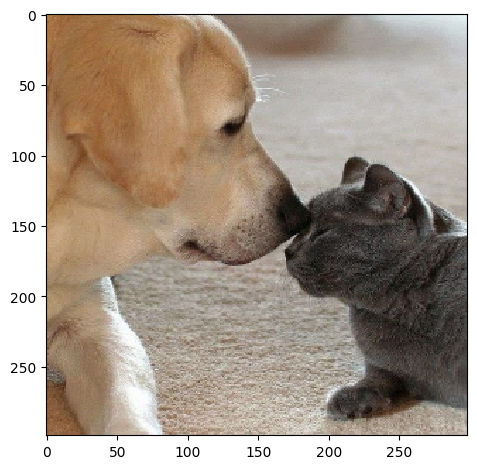

In [ ]:
Xi = skimage.io.imread("https://arteagac.github.io/blog/lime_image/img/cat-and-dog.jpg")
Xi = skimage.transform.resize(Xi, (299, 299))
Xi = (Xi - 0.5) * 2.0 # Normalisation
skimage.io.imshow(Xi/2 + 0.5)

In [ ]:
preds = inceptionV3_model.predict(Xi[np.newaxis,:,:,:]) ## Batch conversion
decode_predictions(preds)[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step


[('n02099712', 'Labrador_retriever', np.float32(0.8182907)),
 ('n02099601', 'golden_retriever', np.float32(0.015929857)),
 ('n02093428', 'American_Staffordshire_terrier', np.float32(0.010066448)),
 ('n02108422', 'bull_mastiff', np.float32(0.009287024)),
 ('n02109047', 'Great_Dane', np.float32(0.008600983))]

In [ ]:
top_pred_classes = preds[0].argsort()[-5:][::-1]
top_pred_classes

array([208, 207, 180, 243, 246])

In [34]:
superpixels = skimage.segmentation.quickshift(Xi, kernel_size=4,max_dist=200, ratio=0.2)
num_superpixels = np.unique(superpixels).shape[0]
num_superpixels

71

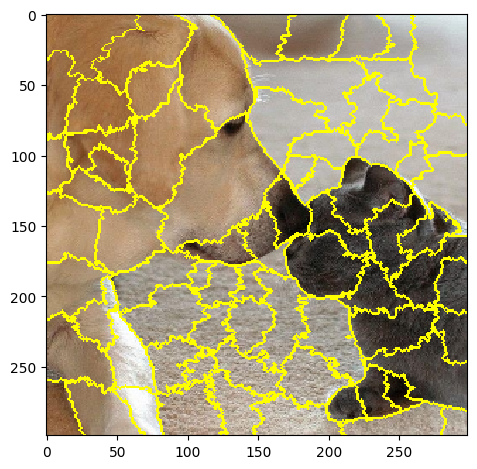

In [ ]:
skimage.io.imshow(skimage.segmentation.mark_boundaries(Xi/2 + 0.5, superpixels))

In [ ]:
num_perturb = 150
perturbations = np.random.binomial(1, 0.5, (num_perturb, num_superpixels))
perturbations[0]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1])

In [ ]:
def perturb_image(img, perturbation, segments):
  active_pixels = np.where(perturbation == 1)[0]
  mask = np.zeros(segments.shape)
  for active in active_pixels:
    mask[segments == active] = 1
  perturbed_image = copy.deepcopy(img)
  perturbed_image = perturbed_image * mask[:,:,np.newaxis]
  return perturbed_image

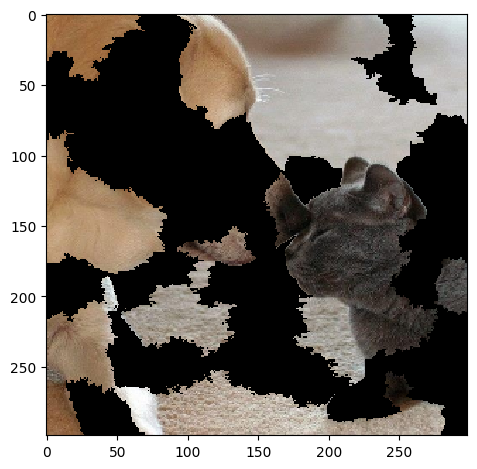

In [ ]:
skimage.io.imshow(perturb_image(Xi/2 + 0.5, perturbations[0], superpixels))

In [ ]:
predictions = []
for pert in perturbations:
  perturbed_img = perturb_image(Xi,pert,superpixels)
  pred = inceptionV3_model.predict(perturbed_img[np.newaxis,:,:,:])
  predictions.append(pred)

predictions = np.array(predictions)
predictions.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 503ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 451ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 743ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 517ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 785ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

(150, 1, 1000)

In [ ]:
original_image = np.ones(num_superpixels)[np.newaxis,:] #Perturbation with all superpixels enabled
distances = sklearn.metrics.pairwise_distances(perturbations,original_image, metric='cosine').ravel()
distances.shape

(150,)

In [ ]:
kernel_width = 0.25
weights = np.sqrt(np.exp(-(distances**2)/kernel_width**2)) #Kernel function
weights.shape

(150,)

In [ ]:
class_to_explain = top_pred_classes[0]
simpler_model = LinearRegression()
simpler_model.fit(X=perturbations, y=predictions[:,:,class_to_explain], sample_weight=weights)
coeff = simpler_model.coef_[0]
coeff

array([-0.01975756,  0.02890523,  0.09773034, -0.07077197,  0.01226661,
       -0.0390737 ,  0.08599674,  0.06615402,  0.16209119, -0.00545684,
        0.02075405,  0.00565552, -0.02544887,  0.05275621, -0.02020371,
       -0.03512588,  0.02934022, -0.02005871,  0.05463249,  0.11812955,
        0.05091738, -0.05415384, -0.03803931,  0.0916686 , -0.05329214,
        0.00433408,  0.49017092,  0.07340018, -0.06991862,  0.02384899,
       -0.09013823,  0.02321304, -0.01358388,  0.0643717 ,  0.00246434,
        0.10972199, -0.03170206,  0.01592644,  0.05989287, -0.05245653,
       -0.07991652,  0.04651938,  0.08096438,  0.02835787, -0.0145496 ,
       -0.0234853 ,  0.01403239, -0.03413976, -0.14304719, -0.01489691,
       -0.06047827, -0.04998902,  0.00299781, -0.08266212, -0.00696957,
       -0.0255473 ,  0.00257921,  0.02024968,  0.01250592, -0.00837579,
        0.00607834,  0.03014403, -0.04844887, -0.00964874,  0.07611755,
        0.05853306,  0.00947881, -0.01224528,  0.08708015, -0.05

In [ ]:
num_top_features = 4
top_features = np.argsort(coeff)[-num_top_features:]
top_features

array([35, 19,  8, 26])

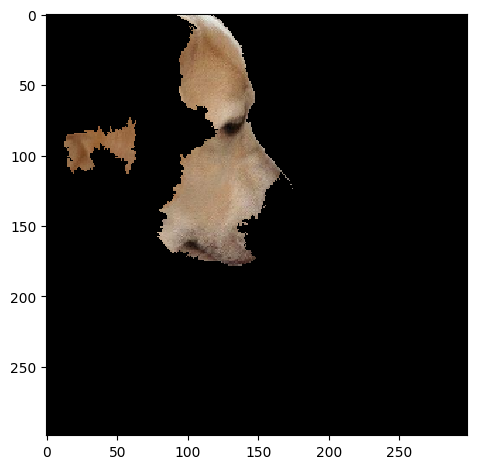

In [32]:
mask = np.zeros(num_superpixels)
mask[top_features]= True #Activate top superpixels
skimage.io.imshow(perturb_image(Xi/2+0.5,mask,superpixels))